In [1]:
%matplotlib inline

In [2]:
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Using TensorFlow backend.


In [3]:
np.random.seed(10)

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
x_train_4d = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test_4d = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

In [6]:
x_train_4d_normalize = x_train_4d / 255
x_test_4d_normalize = x_test_4d / 255

In [7]:
y_train_one_hot = np_utils.to_categorical(y_train)
y_test_one_hot = np_utils.to_categorical(y_test)

In [8]:
model = Sequential()

In [9]:
model.add(Conv2D(filters=16, kernel_size=(5, 5), padding='same', input_shape=(28, 28, 1), activation='relu'))

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [11]:
model.add(Conv2D(filters=36, kernel_size=(5, 5), padding='same', activation='relu'))

In [12]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [13]:
model.add(Dropout(0.25))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [14]:
model.add(Flatten())

In [15]:
model.add(Dense(128, activation='relu'))

In [16]:
model.add(Dropout(0.5))

In [17]:
model.add(Dense(10, activation='softmax'))

In [18]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               225920    
__________

In [19]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
train_history = model.fit(x=x_train_4d_normalize, y=y_train_one_hot, validation_split=0.2, epochs=10, batch_size=300, verbose=2)

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 58s - loss: 0.4897 - acc: 0.8468 - val_loss: 0.0978 - val_acc: 0.9718
Epoch 2/10
 - 57s - loss: 0.1421 - acc: 0.9582 - val_loss: 0.0637 - val_acc: 0.9807
Epoch 3/10
 - 57s - loss: 0.1032 - acc: 0.9690 - val_loss: 0.0515 - val_acc: 0.9841
Epoch 4/10
 - 57s - loss: 0.0849 - acc: 0.9754 - val_loss: 0.0456 - val_acc: 0.9858
Epoch 5/10
 - 57s - loss: 0.0723 - acc: 0.9783 - val_loss: 0.0401 - val_acc: 0.9873
Epoch 6/10
 - 57s - loss: 0.0642 - acc: 0.9811 - val_loss: 0.0397 - val_acc: 0.9886
Epoch 7/10
 - 57s - loss: 0.0569 - acc: 0.9827 - val_loss: 0.0415 - val_acc: 0.9879
Epoch 8/10
 - 57s - loss: 0.0516 - acc: 0.9841 - val_loss: 0.0337 - val_acc: 0.9897
Epoch 9/10
 - 57s - loss: 0.0451 - acc: 0.9864 - val_loss: 0.0341 - val_acc: 0.9901
Epoch 10/10
 - 57s - loss: 0.0427 - acc: 0.9870 - val_loss: 0.0329 - val_acc: 0.9907


In [21]:
def show_train_history(train_history_p, train, validation):
    plt.plot(train_history_p.history[train])
    plt.plot(train_history_p.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

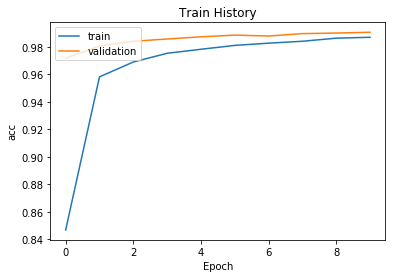

In [22]:
show_train_history(train_history, 'acc', 'val_acc')

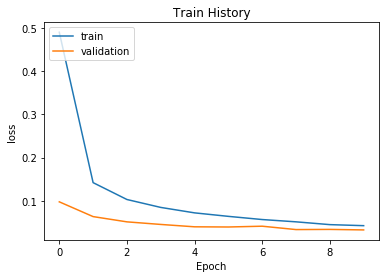

In [23]:
show_train_history(train_history, 'loss', 'val_loss')

In [24]:
scores = model.evaluate(x_test_4d_normalize, y_test_one_hot)
scores[1]

10000/10000 [==============================] - 6s 553us/step


0.9907

In [25]:
prediction = model.predict_classes(x_test_4d_normalize)

In [26]:
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [27]:
def plot_images_labels_prediction(images, labels, prediction_i, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25: num = 25
    for i in range(0, num):
        ax = plt.subplot(5, 5, i + 1)
        ax.imshow(images[idx], cmap='binary')
        title = 'label=' + str(labels[idx])
        if len(prediction_i) > 0:
            title += ', predict=' + str(prediction_i[idx])
            
        ax.set_title(title, fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        idx += 1
    plt.show()

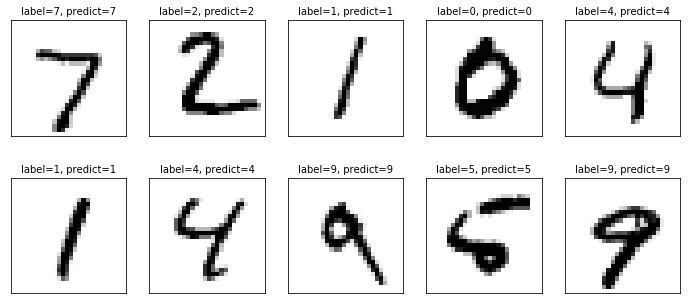

In [28]:
plot_images_labels_prediction(x_test, y_test, prediction, idx=0)

In [29]:
pd.crosstab(y_test, prediction, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,976,1,0,0,0,0,2,1,0,0
1,0,1131,1,0,0,1,0,1,1,0
2,1,1,1026,1,1,0,0,2,0,0
3,0,0,0,1006,0,1,0,2,1,0
4,0,0,0,0,976,0,1,0,1,4
5,1,0,0,5,0,882,2,1,0,1
6,5,3,0,0,1,1,948,0,0,0
7,0,1,4,3,0,0,0,1017,1,2
8,4,0,3,2,1,2,0,2,956,4
